### Surya Teja Koppula: Assignment 3

### Part 1:

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import backend as K
from keras.utils.vis_utils import plot_model
import keras

import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('income_dataset.csv', low_memory = False)

In [6]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
data.rename(columns={'education.num':'education_num', 'marital.status':'marital_status', 'capital.gain':'capital_gain', 'capital.loss':'capital_loss', 'hours.per.week':'hours_per_week', 'native.country':'native_country'}, inplace=True)

In [8]:
#Printing the shape of the income dataset
print("The shape of the dataset is {data.shape}")

The shape of the dataset is {data.shape}


In [9]:
#Printing the size of the income dataset
print("The size of the dataset is {data.size}")

The size of the dataset is {data.size}


In [10]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [12]:
data.workclass.replace(('?'), (np.nan), inplace = True)
data.occupation.replace(('?'), (np.nan), inplace = True)
data.native_country.replace(('?'), (np.nan), inplace = True)

In [15]:
data_d = data.dropna()

In [16]:
data_d.drop_duplicates(inplace = True)

In [17]:
data_d.shape

(30139, 15)

In [18]:
country_list = data_d.native_country

In [19]:
count = Counter(country_list).most_common(10)
country_name = [(lambda x : x)(x[0]) for x in count]
country_frequency = [(lambda x : x)(x[1]) for x in count]

In [20]:
country = pd.DataFrame({'country_name': country_name, 'country_frequency' : country_frequency}, columns=['country_name', 'country_frequency'])
country_set = set(country_list)
country

,country_name,country_frequency
0,United-States,27487
1,Mexico,606
2,Philippines,188
3,Germany,128
4,Puerto-Rico,109
5,Canada,107
6,India,100
7,El-Salvador,100
8,Cuba,92
9,England,86


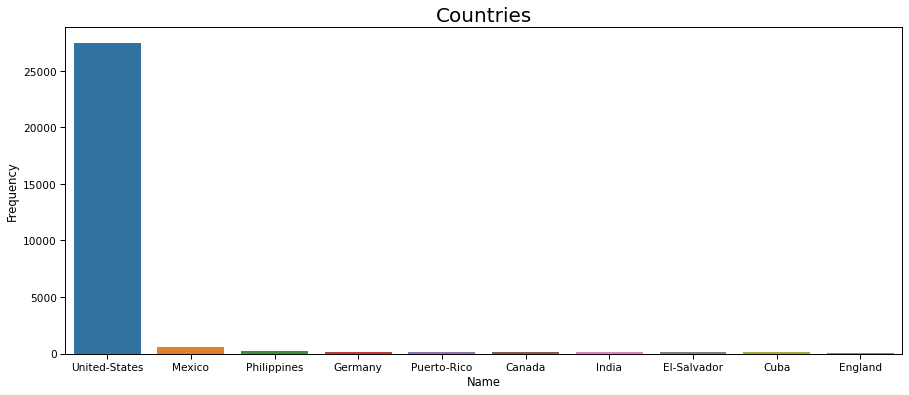

In [21]:
plt.figure(figsize=(15,6))
sns.set_context('paper', font_scale=1.2)
sns.barplot(x='country_name', y='country_frequency', data=country)
plt.title('Countries', fontsize = 20)
plt.xlabel('Name')
plt.ylabel('Frequency')
plt.show()

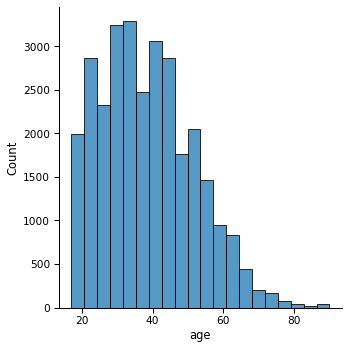

In [22]:
sns.displot(data_d, x="age", bins = 20)

In [23]:
education_list = data_d.education

In [24]:
count = Counter(education_list).most_common(10)
edu_name = [(lambda x : x)(x[0]) for x in count]
edu_frequency = [(lambda x : x)(x[1]) for x in count]

In [25]:
cmap = plt.get_cmap('Pastel1')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

In [26]:
edu = pd.DataFrame({'edu_name': edu_name, 'edu_frequency' : edu_frequency}, columns=['edu_name', 'edu_frequency'])
edu_set = set(education_list)
edu

,edu_name,edu_frequency
0,HS-grad,9834
1,Some-college,6669
2,Bachelors,5042
3,Masters,1626
4,Assoc-voc,1307
5,11th,1048
6,Assoc-acdm,1008
7,10th,820
8,7th-8th,556
9,Prof-school,542


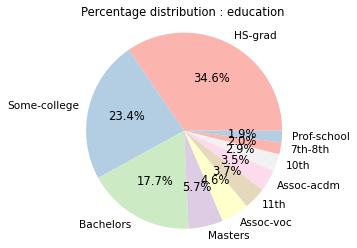

In [27]:
plt.pie(edu_frequency, labels = edu_name, autopct = '%1.1f%%' ,colors = colors)
plt.title('Percentage distribution : education')
plt.axis('equal')
plt.show()

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [29]:
data_d

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [30]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

convert = ["workclass","education", "marital_status","occupation", "relationship","race","sex","native_country"]
for i in convert:
    le = LabelEncoder()
    data_d[i] = le.fit_transform(data_d[i])

In [31]:
data_d

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,82,2,132870,11,9,6,3,1,4,0,0,4356,18,38,<=50K
3,54,2,140359,5,4,0,6,4,4,0,0,3900,40,38,<=50K
4,41,2,264663,15,10,5,9,3,4,0,0,3900,40,38,<=50K
5,34,2,216864,11,9,0,7,4,4,0,0,3770,45,38,<=50K
6,38,2,150601,0,6,5,0,4,4,1,0,3770,40,38,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,2,310152,15,10,4,10,1,4,1,0,0,40,38,<=50K
32557,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,<=50K
32558,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,>50K
32559,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,<=50K


In [32]:
data_d.income.replace(('<=50K', '>50K'), (0,1), inplace = True)

In [33]:
data_duplicate = data_d

In [34]:
scaler = preprocessing.StandardScaler().fit(data_d)
scaler

StandardScaler()

In [35]:
col_names= data_d.columns
X_scaled = scaler.transform(data_d)
nd=pd.DataFrame(X_scaled, columns = col_names)
nd

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,3.317157,-0.20898,-0.538773,0.174959,-0.440434,2.283147,-0.734570,-0.261297,0.385108,-1.443574,-0.147502,10.551814,-1.914647,0.264666,-0.575882
1,1.184832,-0.20898,-0.467892,-1.399020,-2.402221,-1.722039,0.009847,1.611826,0.385108,-1.443574,-0.147502,9.424325,-0.078031,0.264666,-0.575882
2,0.194824,-0.20898,0.708595,1.224279,-0.048076,1.615616,0.754264,0.987452,0.385108,-1.443574,-0.147502,9.424325,-0.078031,0.264666,-0.575882
3,-0.338257,-0.20898,0.256197,0.174959,-0.440434,-1.722039,0.257986,1.611826,0.385108,-1.443574,-0.147502,9.102892,0.339381,0.264666,-0.575882
4,-0.033639,-0.20898,-0.370956,-2.710670,-1.617506,1.615616,-1.478987,1.611826,0.385108,0.692725,-0.147502,9.102892,-0.078031,0.264666,-0.575882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,-1.252110,-0.20898,1.139131,1.224279,-0.048076,0.948085,1.002403,-0.261297,0.385108,0.692725,-0.147502,-0.218673,-0.078031,0.264666,-0.575882
30135,-0.871338,-0.20898,0.638926,-0.874360,0.736639,-0.386977,1.498681,2.236200,0.385108,-1.443574,-0.147502,-0.218673,-0.244996,0.264666,-0.575882
30136,0.118670,-0.20898,-0.335246,0.174959,-0.440434,-0.386977,0.009847,-0.885672,0.385108,0.692725,-0.147502,-0.218673,-0.078031,0.264666,1.736468
30137,1.489450,-0.20898,-0.358567,0.174959,-0.440434,2.283147,-1.478987,1.611826,0.385108,-1.443574,-0.147502,-0.218673,-0.078031,0.264666,-0.575882


In [36]:
nd['income'] = nd['income'].astype("int32")

In [37]:
nd.loc[nd["income"] < 0, "income"] = 0

In [38]:
nd.loc[nd["income"] > 0, "income"] = 1

In [39]:
nd['income']

0        0
1        0
2        0
3        0
4        0
        ..
30134    0
30135    0
30136    1
30137    0
30138    0
Name: income, Length: 30139, dtype: int32

In [40]:
nd

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,3.317157,-0.20898,-0.538773,0.174959,-0.440434,2.283147,-0.734570,-0.261297,0.385108,-1.443574,-0.147502,10.551814,-1.914647,0.264666,0
1,1.184832,-0.20898,-0.467892,-1.399020,-2.402221,-1.722039,0.009847,1.611826,0.385108,-1.443574,-0.147502,9.424325,-0.078031,0.264666,0
2,0.194824,-0.20898,0.708595,1.224279,-0.048076,1.615616,0.754264,0.987452,0.385108,-1.443574,-0.147502,9.424325,-0.078031,0.264666,0
3,-0.338257,-0.20898,0.256197,0.174959,-0.440434,-1.722039,0.257986,1.611826,0.385108,-1.443574,-0.147502,9.102892,0.339381,0.264666,0
4,-0.033639,-0.20898,-0.370956,-2.710670,-1.617506,1.615616,-1.478987,1.611826,0.385108,0.692725,-0.147502,9.102892,-0.078031,0.264666,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,-1.252110,-0.20898,1.139131,1.224279,-0.048076,0.948085,1.002403,-0.261297,0.385108,0.692725,-0.147502,-0.218673,-0.078031,0.264666,0
30135,-0.871338,-0.20898,0.638926,-0.874360,0.736639,-0.386977,1.498681,2.236200,0.385108,-1.443574,-0.147502,-0.218673,-0.244996,0.264666,0
30136,0.118670,-0.20898,-0.335246,0.174959,-0.440434,-0.386977,0.009847,-0.885672,0.385108,0.692725,-0.147502,-0.218673,-0.078031,0.264666,1
30137,1.489450,-0.20898,-0.358567,0.174959,-0.440434,2.283147,-1.478987,1.611826,0.385108,-1.443574,-0.147502,-0.218673,-0.078031,0.264666,0


In [41]:
train = nd.sample(frac = 0.80)
test = nd.drop(train.index)

In [42]:
train

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
7516,-0.642875,-0.208980,1.063385,-0.349701,1.128996,-0.386977,1.250542,-0.885672,-3.208687,0.692725,-0.147502,-0.218673,-0.078031,-3.012496,0
27878,-0.947492,-0.208980,-0.935860,-0.874360,0.736639,0.948085,0.257986,0.987452,-2.010755,-1.443574,-0.147502,-0.218673,-2.165095,0.264666,0
23476,-0.719029,-0.208980,2.115357,-0.874360,0.736639,0.948085,1.250542,-0.261297,0.385108,0.692725,-0.147502,-0.218673,0.339381,-1.865490,0
4574,0.956369,-0.208980,1.864318,-0.349701,1.128996,0.948085,1.250542,-0.261297,0.385108,0.692725,-0.147502,-0.218673,1.174207,0.264666,1
19675,-1.252110,-0.208980,1.199297,0.174959,-0.440434,0.948085,-0.982709,-0.261297,0.385108,0.692725,-0.147502,-0.218673,0.756794,0.264666,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,-0.109793,-0.208980,0.693745,-0.349701,1.128996,-0.386977,-0.734570,-0.885672,0.385108,0.692725,0.837518,-0.218673,-0.078031,0.264666,1
18832,1.413296,0.839017,-0.777782,0.174959,-0.440434,1.615616,-0.486431,-0.261297,0.385108,0.692725,-0.147502,-0.218673,1.591619,0.264666,1
24418,0.194824,-0.208980,0.102757,-1.136690,-2.009864,-1.722039,0.257986,0.363077,0.385108,-1.443574,-0.147502,-0.218673,-0.495444,0.264666,0
24909,-1.175956,-0.208980,0.967547,0.174959,-0.440434,0.948085,0.009847,0.987452,0.385108,0.692725,-0.147502,-0.218673,-0.912857,0.264666,0


In [43]:
y_train = train[train.columns[14]].to_numpy()
y_test = test[test.columns[14]].to_numpy()
x_train = train[train.columns[0:13]].to_numpy()
x_test = test[test.columns[0:13]].to_numpy()
x_train

array([[-0.64287459, -0.20898049,  1.0633854 , ..., -0.14750209,
        -0.21867335, -0.07803133],
       [-0.94749241, -0.20898049, -0.93585987, ..., -0.14750209,
        -0.21867335, -2.16509452],
       [-0.71902904, -0.20898049,  2.11535673, ..., -0.14750209,
        -0.21867335,  0.33938131],
       ...,
       [ 0.19482442, -0.20898049,  0.10275691, ..., -0.14750209,
        -0.21867335, -0.49544397],
       [-1.17595578, -0.20898049,  0.96754686, ..., -0.14750209,
        -0.21867335, -0.91285661],
       [ 1.18483233, -0.20898049, -1.07376855, ..., -0.14750209,
        -0.21867335,  0.75679395]])

In [44]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
x_train.shape

(24111, 13)

In [46]:
y_train.shape

(24111,)

In [47]:
num_classes = 2
epochs = 30
#converting the Y(train,test) to a binary class matrix 
y_train = tf.keras.utils.to_categorical(y_train,num_classes=2,dtype='int32')
y_test = tf.keras.utils.to_categorical(y_test,num_classes=2,dtype='int32')
print(y_train.shape)
print(x_train.shape)

(24111, 2)
(24111, 13)


In [48]:
y_test

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [49]:
epochs = 30
model = Sequential()
model.add(tf.keras.Input(shape=13))
model.add(Dense(100,activation='relu',name='Hidden_Layer1'))
model.add(Dense(100,activation='relu',name='Hidden_Layer2'))
model.add(Dropout(rate=0.45))
model.add(Dense(2,activation='softmax',name='Output_Layer'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer1 (Dense)       (None, 100)               1400      
                                                                 
 Hidden_Layer2 (Dense)       (None, 100)               10100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 Output_Layer (Dense)        (None, 2)                 202       
                                                                 
Total params: 11,702
Trainable params: 11,702
Non-trainable params: 0
_________________________________________________________________


In [51]:
model_d = model.fit(x_train, y_train, batch_size=128, epochs=epochs,verbose=1, validation_data=(x_test,y_test))

Epoch 1/30
189/189 [==============================] - 1s 2ms/step - loss: 0.3962 - accuracy: 0.8164 - val_loss: 0.3394 - val_accuracy: 0.8379
Epoch 2/30
189/189 [==============================] - 0s 1ms/step - loss: 0.3466 - accuracy: 0.8378 - val_loss: 0.3286 - val_accuracy: 0.8454
Epoch 3/30
189/189 [==============================] - 0s 1ms/step - loss: 0.3382 - accuracy: 0.8426 - val_loss: 0.3241 - val_accuracy: 0.8485
Epoch 4/30
189/189 [==============================] - 0s 1ms/step - loss: 0.3350 - accuracy: 0.8436 - val_loss: 0.3252 - val_accuracy: 0.8487
Epoch 5/30
189/189 [==============================] - 0s 1ms/step - loss: 0.3339 - accuracy: 0.8449 - val_loss: 0.3228 - val_accuracy: 0.8470
Epoch 6/30
189/189 [==============================] - 0s 1ms/step - loss: 0.3316 - accuracy: 0.8465 - val_loss: 0.3227 - val_accuracy: 0.8490
Epoch 7/30
189/189 [==============================] - 0s 1ms/step - loss: 0.3302 - accuracy: 0.8484 - val_loss: 0.3230 - val_accuracy: 0.8482
Epoch 

In [52]:
model_ev = model.evaluate(x_test,y_test,verbose = 0)
print("Accuracy on test set for Model: ",round(model_ev[1],2)*100,'%')

Accuracy on test set for Model:  85.0 %


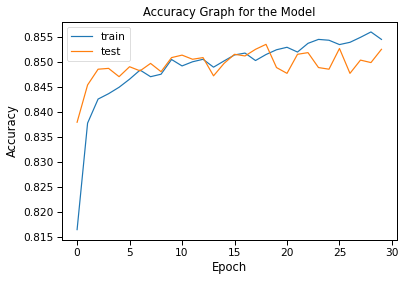

In [53]:
plt.plot(model_d.history['accuracy'])
plt.plot(model_d.history['val_accuracy'])
plt.title('Accuracy Graph for the Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

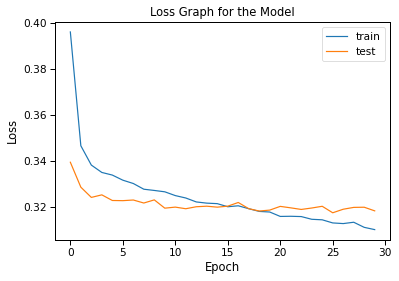

In [54]:
plt.plot(model_d.history['loss'])
plt.plot(model_d.history['val_loss'])
plt.title('Loss Graph for the Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## Bonus

In [55]:
data_d

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,82,2,132870,11,9,6,3,1,4,0,0,4356,18,38,0
3,54,2,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,2,264663,15,10,5,9,3,4,0,0,3900,40,38,0
5,34,2,216864,11,9,0,7,4,4,0,0,3770,45,38,0
6,38,2,150601,0,6,5,0,4,4,1,0,3770,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,2,310152,15,10,4,10,1,4,1,0,0,40,38,0
32557,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32558,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32559,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0


In [58]:
scaler = preprocessing.StandardScaler().fit(data_d)
scaler

StandardScaler()

In [59]:
col_names= data_d.columns
X_scaled = scaler.transform(data_d)
nd=pd.DataFrame(X_scaled, columns = col_names)

In [60]:
nd['income'] = nd['income'].astype("int64")
nd.loc[nd["income"] < 0, "income"] = 0
nd.loc[nd["income"] > 0, "income"] = 1

In [61]:
train = nd.sample(frac = 0.80)
test = nd.drop(train.index)
y_train = train[train.columns[14]].to_numpy()
y_test = test[test.columns[14]].to_numpy()
x_train = train[train.columns[0:13]].to_numpy()
x_test = test[test.columns[0:13]].to_numpy()

In [62]:
num_classes = 2
#converting the Y train and test to a binary class matrix 
y_train = tf.keras.utils.to_categorical(y_train,num_classes,dtype='int32')
print(np.shape(y_test))
y_test = tf.keras.utils.to_categorical(y_test,num_classes,dtype='int32')

(6028,)


## Optimizing by varying Activation function: 'softmax' and 'sigmoid'

In [63]:
init1 = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)
init2 = tf.keras.initializers.HeUniform(seed=None)

In [64]:
#changing activation functions
c=2
epochs = 30
model1_1 = Sequential()
model1_1.add(tf.keras.Input(shape=13))
model1_1.add(Dense(100,activation='softmax',name='Hidden_Layer1',kernel_initializer=init2))
model1_1.add(Dense(100,activation='softmax',name='Hidden_Layer2',kernel_initializer=init2))
model1_1.add(Dropout(rate=0.45))
model1_1.add(Dense(2,activation='softmax',name='Output_Layer'))
model1_1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [65]:
model1_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer1 (Dense)       (None, 100)               1400      
                                                                 
 Hidden_Layer2 (Dense)       (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 Output_Layer (Dense)        (None, 2)                 202       
                                                                 
Total params: 11,702
Trainable params: 11,702
Non-trainable params: 0
_________________________________________________________________


In [66]:
 model1_d1 = model1_1.fit(x_train,y_train,batch_size=128,
                      epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Epoch 1/30
189/189 [==============================] - 1s 2ms/step - loss: 0.6215 - accuracy: 0.7511 - val_loss: 0.5829 - val_accuracy: 0.7449
Epoch 2/30
189/189 [==============================] - 0s 1ms/step - loss: 0.5608 - accuracy: 0.7525 - val_loss: 0.5534 - val_accuracy: 0.7449
Epoch 3/30
189/189 [==============================] - 0s 1ms/step - loss: 0.5320 - accuracy: 0.7525 - val_loss: 0.5191 - val_accuracy: 0.7449
Epoch 4/30
189/189 [==============================] - 0s 1ms/step - loss: 0.4906 - accuracy: 0.7525 - val_loss: 0.4708 - val_accuracy: 0.7449
Epoch 5/30
189/189 [==============================] - 0s 1ms/step - loss: 0.4481 - accuracy: 0.7545 - val_loss: 0.4294 - val_accuracy: 0.7449
Epoch 6/30
189/189 [==============================] - 0s 1ms/step - loss: 0.4155 - accuracy: 0.8010 - val_loss: 0.4008 - val_accuracy: 0.8180
Epoch 7/30
189/189 [==============================] - 0s 1ms/step - loss: 0.3944 - accuracy: 0.8255 - val_loss: 0.3834 - val_accuracy: 0.8235
Epoch 

In [67]:
model1_ev1 = model1_1.evaluate(x_test,y_test,verbose = 2)
print("Accuracy on test set for Model 1: ",model1_ev1[1])

189/189 - 0s - loss: 0.3305 - accuracy: 0.8447 - 86ms/epoch - 455us/step
Accuracy on test set for Model 1:  0.8447245955467224


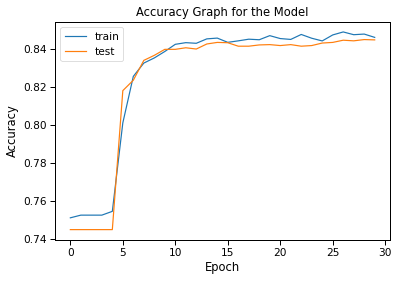

In [68]:
plt.plot(model1_d1.history['accuracy'])
plt.plot(model1_d1.history['val_accuracy'])
plt.title('Accuracy Graph for the Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

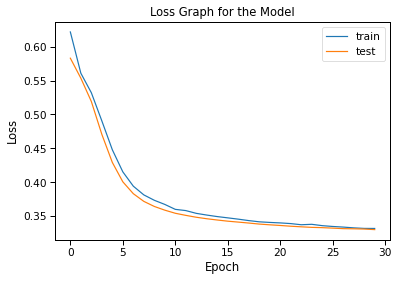

In [69]:
plt.plot(model1_d1.history['loss'])
plt.plot(model1_d1.history['val_loss'])
plt.title('Loss Graph for the Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [70]:
c=2
epochs = 30
model1_2 = Sequential()
model1_2.add(tf.keras.Input(shape=13))
model1_2.add(Dense(100,activation='sigmoid',name='Hidden_Layer1',kernel_initializer=init2))
model1_2.add(Dense(100,activation='sigmoid',name='Hidden_Layer2',kernel_initializer=init2))
model1_2.add(Dropout(rate=0.45))
model1_2.add(Dense(2,activation='sigmoid',name='Output_Layer'))
model1_2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [71]:
model1_d2 = model1_2.fit(x_train,y_train,batch_size=128,
                      epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Epoch 1/30
189/189 [==============================] - 0s 2ms/step - loss: 0.4730 - accuracy: 0.7774 - val_loss: 0.4023 - val_accuracy: 0.8082
Epoch 2/30
189/189 [==============================] - 0s 1ms/step - loss: 0.4093 - accuracy: 0.8126 - val_loss: 0.3904 - val_accuracy: 0.8122
Epoch 3/30
189/189 [==============================] - 0s 1ms/step - loss: 0.3940 - accuracy: 0.8227 - val_loss: 0.3832 - val_accuracy: 0.8179
Epoch 4/30
189/189 [==============================] - 0s 1ms/step - loss: 0.3837 - accuracy: 0.8274 - val_loss: 0.3756 - val_accuracy: 0.8179
Epoch 5/30
189/189 [==============================] - 0s 1ms/step - loss: 0.3765 - accuracy: 0.8289 - val_loss: 0.3716 - val_accuracy: 0.8195
Epoch 6/30
189/189 [==============================] - 0s 1ms/step - loss: 0.3699 - accuracy: 0.8313 - val_loss: 0.3613 - val_accuracy: 0.8212
Epoch 7/30
189/189 [==============================] - 0s 1ms/step - loss: 0.3639 - accuracy: 0.8331 - val_loss: 0.3568 - val_accuracy: 0.8212
Epoch 

In [72]:
model1_ev2 = model1_2.evaluate(x_test,y_test,verbose = 2)
print("Accuracy on test set for Model 1: ",model1_ev2[1])

189/189 - 0s - loss: 0.3271 - accuracy: 0.8386 - 82ms/epoch - 434us/step
Accuracy on test set for Model 1:  0.8385865688323975


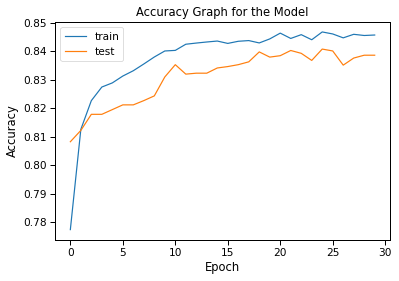

In [73]:
plt.plot(model1_d2.history['accuracy'])
plt.plot(model1_d2.history['val_accuracy'])
plt.title('Accuracy Graph for the Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

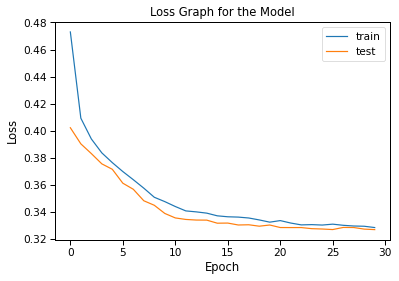

In [74]:
plt.plot(model1_d2.history['loss'])
plt.plot(model1_d2.history['val_loss'])
plt.title('Loss Graph for the Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

#### References:
####  1.https://www.tensorflow.org/guide/keras/preprocessing_layers#:~:text=The%20Keras%20preprocessing%20layers%20API,part%20of%20a%20Keras%20SavedModel
#### 2. https://github.com/keras-team/keras-io/blob/master/guides/preprocessing_layers.py
#### 3.https://keras.io/api/callbacks/early_stopping/
#### 4.https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html